In [2]:
import pandas as pd
import numpy as np
import tabulate
import jupyter

In [3]:
print ("Exercise 1: Concatenate")
print ("=" * 30)


Exercise 1: Concatenate


In [4]:


df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
##print(df1.to_markdown())

df2 = pd.DataFrame([['c', 1], ['d', 2]], columns=['letter', 'number'])
##print(df2.to_markdown())

result = pd.concat([df1, df2], axis=0).reset_index(drop=True)
print(result.to_markdown())

|    | letter   |   number |
|---:|:---------|---------:|
|  0 | a        |        1 |
|  1 | b        |        2 |
|  2 | c        |        1 |
|  3 | d        |        2 |


In [5]:
print ("Exercise 2: Merge")
print ("=" * 30)

Exercise 2: Merge


In [6]:
df1_dict = {
    'id': ['1', '2', '3', '4', '5'],
    'Feature1': ['A', 'C', 'E', 'G', 'I'],
    'Feature2': ['B', 'D', 'F', 'H', 'J']
}
df2_dict = {
    'id': ['1', '2', '6', '7', '8'],
    'Feature1': ['K', 'M', 'O', 'Q', 'S'],
    'Feature2': ['L', 'N', 'P', 'R', 'T']
}
df1 = pd.DataFrame(df1_dict)
df2 = pd.DataFrame(df2_dict)

In [7]:
print (df1.to_markdown()) 

|    |   id | Feature1   | Feature2   |
|---:|-----:|:-----------|:-----------|
|  0 |    1 | A          | B          |
|  1 |    2 | C          | D          |
|  2 |    3 | E          | F          |
|  3 |    4 | G          | H          |
|  4 |    5 | I          | J          |


In [8]:
print (df2.to_markdown())

|    |   id | Feature1   | Feature2   |
|---:|-----:|:-----------|:-----------|
|  0 |    1 | K          | L          |
|  1 |    2 | M          | N          |
|  2 |    6 | O          | P          |
|  3 |    7 | Q          | R          |
|  4 |    8 | S          | T          |


In [9]:
merged_inner = pd.merge(df1, df2, on='id', how='inner', suffixes=('_x', '_y'))
print(merged_inner.to_markdown())

|    |   id | Feature1_x   | Feature2_x   | Feature1_y   | Feature2_y   |
|---:|-----:|:-------------|:-------------|:-------------|:-------------|
|  0 |    1 | A            | B            | K            | L            |
|  1 |    2 | C            | D            | M            | N            |


In [10]:
merged_outer = pd.merge(
    df1, df2, on='id', how='outer',
    suffixes=('_df1', '_df2')
)
print(merged_outer.to_markdown())

|    |   id | Feature1_df1   | Feature2_df1   | Feature1_df2   | Feature2_df2   |
|---:|-----:|:---------------|:---------------|:---------------|:---------------|
|  0 |    1 | A              | B              | K              | L              |
|  1 |    2 | C              | D              | M              | N              |
|  2 |    3 | E              | F              | nan            | nan            |
|  3 |    4 | G              | H              | nan            | nan            |
|  4 |    5 | I              | J              | nan            | nan            |
|  5 |    6 | nan            | nan            | O              | P              |
|  6 |    7 | nan            | nan            | Q              | R              |
|  7 |    8 | nan            | nan            | S              | T              |


In [11]:
print ("Exercise 3: Merge MultiIndex")
print ("=" * 30)

Exercise 3: Merge MultiIndex


In [12]:
all_dates = pd.date_range('2021-01-01', '2021-12-15')
business_dates = pd.bdate_range('2021-01-01', '2021-12-31')
tickers = ['AAPL', 'FB', 'GE', 'AMZN', 'DAI']

index_alt = pd.MultiIndex.from_product([all_dates, tickers], names=['Date', 'Ticker'])
index = pd.MultiIndex.from_product([business_dates, tickers], names=['Date', 'Ticker'])

market_data = pd.DataFrame(index=index, data=np.random.randn(len(index), 3), columns=['Open','Close','Close_Adjusted'])
alternative_data = pd.DataFrame(index=index_alt, data=np.random.randn(len(index_alt), 2), columns=['Twitter','Reddit'])

merged = market_data.merge(alternative_data, how='left', left_index=True, right_index=True)
print(merged.head().to_markdown())

|                                            |       Open |      Close |   Close_Adjusted |      Twitter |    Reddit |
|:-------------------------------------------|-----------:|-----------:|-----------------:|-------------:|----------:|
| (Timestamp('2021-01-01 00:00:00'), 'AAPL') |  1.03171   | -0.0520041 |        -0.211697 |  0.000713629 | -0.739859 |
| (Timestamp('2021-01-01 00:00:00'), 'FB')   | -0.739066  | -0.786499  |         0.416893 | -0.346205    | -1.102    |
| (Timestamp('2021-01-01 00:00:00'), 'GE')   | -0.784526  |  1.92695   |        -0.885244 |  2.42712     | -1.02412  |
| (Timestamp('2021-01-01 00:00:00'), 'AMZN') |  0.0460074 |  0.533282  |        -0.572215 | -0.0772652   | -2.08263  |
| (Timestamp('2021-01-01 00:00:00'), 'DAI')  |  1.08262   | -1.44911   |         0.565665 |  1.15483     | -2.12083  |


In [13]:
print(merged[merged.isnull().any(axis=1)].head(10).to_markdown())

|                                            |      Open |     Close |   Close_Adjusted |   Twitter |   Reddit |
|:-------------------------------------------|----------:|----------:|-----------------:|----------:|---------:|
| (Timestamp('2021-12-16 00:00:00'), 'AAPL') |  0.74281  |  2.17992  |       -0.163524  |       nan |      nan |
| (Timestamp('2021-12-16 00:00:00'), 'FB')   | -1.86167  |  0.869967 |       -0.159076  |       nan |      nan |
| (Timestamp('2021-12-16 00:00:00'), 'GE')   | -0.532375 | -0.399788 |        0.769834  |       nan |      nan |
| (Timestamp('2021-12-16 00:00:00'), 'AMZN') |  1.86399  |  0.301667 |        0.0450489 |       nan |      nan |
| (Timestamp('2021-12-16 00:00:00'), 'DAI')  |  0.909052 |  0.853865 |       -0.515769  |       nan |      nan |
| (Timestamp('2021-12-17 00:00:00'), 'AAPL') | -0.181494 | -1.27339  |       -0.508017  |       nan |      nan |
| (Timestamp('2021-12-17 00:00:00'), 'FB')   | -1.2088   |  1.18041  |        1.15294   |       

In [14]:
filled = merged.fillna(0)
print(filled.head().to_markdown())

|                                            |       Open |      Close |   Close_Adjusted |      Twitter |    Reddit |
|:-------------------------------------------|-----------:|-----------:|-----------------:|-------------:|----------:|
| (Timestamp('2021-01-01 00:00:00'), 'AAPL') |  1.03171   | -0.0520041 |        -0.211697 |  0.000713629 | -0.739859 |
| (Timestamp('2021-01-01 00:00:00'), 'FB')   | -0.739066  | -0.786499  |         0.416893 | -0.346205    | -1.102    |
| (Timestamp('2021-01-01 00:00:00'), 'GE')   | -0.784526  |  1.92695   |        -0.885244 |  2.42712     | -1.02412  |
| (Timestamp('2021-01-01 00:00:00'), 'AMZN') |  0.0460074 |  0.533282  |        -0.572215 | -0.0772652   | -2.08263  |
| (Timestamp('2021-01-01 00:00:00'), 'DAI')  |  1.08262   | -1.44911   |         0.565665 |  1.15483     | -2.12083  |


In [15]:
print("Number of zeros in filled DataFrame:", (filled == 0).sum().sum())

Number of zeros in filled DataFrame: 120


In [16]:
print("Shape of merged DataFrame:", merged.shape)
print("Shape of filled DataFrame:", filled.shape)

Shape of merged DataFrame: (1305, 5)
Shape of filled DataFrame: (1305, 5)


In [17]:
print("Exercise 4: Groupby Apply (Winsorize)")
print("=" * 30)

Exercise 4: Groupby Apply (Winsorize)


In [18]:
df = pd.DataFrame(range(1,11), columns=['sequence'])
print(df.to_markdown())

|    |   sequence |
|---:|-----------:|
|  0 |          1 |
|  1 |          2 |
|  2 |          3 |
|  3 |          4 |
|  4 |          5 |
|  5 |          6 |
|  6 |          7 |
|  7 |          8 |
|  8 |          9 |
|  9 |         10 |


In [19]:
def winsorize(df, quantiles):
    min_val = np.quantile(df['sequence'], quantiles[0])
    max_val = np.quantile(df['sequence'], quantiles[1])
    return df['sequence'].clip(lower=min_val, upper=max_val)

df['sequence'] = winsorize(df, [0.20, 0.80])
print("\nAfter winsorization:")
print(df.to_markdown())


After winsorization:
|    |   sequence |
|---:|-----------:|
|  0 |        2.8 |
|  1 |        2.8 |
|  2 |        3   |
|  3 |        4   |
|  4 |        5   |
|  5 |        6   |
|  6 |        7   |
|  7 |        8   |
|  8 |        8.2 |
|  9 |        8.2 |


In [20]:
groups = np.concatenate([np.ones(10), np.ones(10)+1,  np.ones(10)+2, np.ones(10)+3, np.ones(10)+4])
df_grouped = pd.DataFrame(data=zip(groups, range(1,51)), columns=["group", "sequence"])
print("\nBefore grouped winsorization:")
print(df_grouped.head(12).to_markdown())


Before grouped winsorization:
|    |   group |   sequence |
|---:|--------:|-----------:|
|  0 |       1 |          1 |
|  1 |       1 |          2 |
|  2 |       1 |          3 |
|  3 |       1 |          4 |
|  4 |       1 |          5 |
|  5 |       1 |          6 |
|  6 |       1 |          7 |
|  7 |       1 |          8 |
|  8 |       1 |          9 |
|  9 |       1 |         10 |
| 10 |       2 |         11 |
| 11 |       2 |         12 |


In [21]:
def winsorize_group(df, quantiles):
    min_val = np.quantile(df['sequence'], quantiles[0])
    max_val = np.quantile(df['sequence'], quantiles[1])
    return df['sequence'].clip(lower=min_val, upper=max_val)

result = df_grouped.groupby("group")[['sequence']].apply(winsorize_group, [0.05,0.95]).reset_index(drop=True)
print("\nAfter grouped winsorization:")
print(result.head(12).to_markdown())


After grouped winsorization:
|    |   sequence |
|---:|-----------:|
|  0 |       1.45 |
|  1 |       2    |
|  2 |       3    |
|  3 |       4    |
|  4 |       5    |
|  5 |       6    |
|  6 |       7    |
|  7 |       8    |
|  8 |       9    |
|  9 |       9.55 |
| 10 |      11.45 |
| 11 |      12    |


In [22]:
print("Exercise 5: Groupby Agg")
print("=" * 30)

Exercise 5: Groupby Agg


In [23]:
df = pd.DataFrame({
    'value': [20.45, 22.89, 32.12, 111.22, 33.22, 100, 99.99],
    'product': ['table', 'chair', 'chair', 'mobile phone', 'table', 'mobile phone', 'table']
})

In [24]:
print("Before aggregation:")
print(df.to_markdown())

Before aggregation:
|    |   value | product      |
|---:|--------:|:-------------|
|  0 |   20.45 | table        |
|  1 |   22.89 | chair        |
|  2 |   32.12 | chair        |
|  3 |  111.22 | mobile phone |
|  4 |   33.22 | table        |
|  5 |  100    | mobile phone |
|  6 |   99.99 | table        |


In [25]:
agg_result = df.groupby('product').agg({'value': ['min', 'max', 'mean']})
print("\nAfter aggregation:")
print(agg_result.to_markdown())


After aggregation:
| product      |   ('value', 'min') |   ('value', 'max') |   ('value', 'mean') |
|:-------------|-------------------:|-------------------:|--------------------:|
| chair        |              22.89 |              32.12 |              27.505 |
| mobile phone |             100    |             111.22 |             105.61  |
| table        |              20.45 |              99.99 |              51.22  |


In [26]:
print("Exercise 6: Unstack")
print("=" * 30)

Exercise 6: Unstack


In [27]:
business_dates = pd.bdate_range('2021-01-01', '2021-12-31')
tickers = ['AAPL', 'FB', 'GE', 'AMZN', 'DAI']
index = pd.MultiIndex.from_product([business_dates, tickers], names=['Date', 'Ticker'])

In [28]:
market_data = pd.DataFrame(index=index, data=np.random.randn(len(index), 1), columns=['Prediction'])

In [29]:
print("Before unstacking:")
print(market_data.head().to_markdown())

Before unstacking:
|                                            |   Prediction |
|:-------------------------------------------|-------------:|
| (Timestamp('2021-01-01 00:00:00'), 'AAPL') |    -0.611135 |
| (Timestamp('2021-01-01 00:00:00'), 'FB')   |    -0.417924 |
| (Timestamp('2021-01-01 00:00:00'), 'GE')   |     0.577024 |
| (Timestamp('2021-01-01 00:00:00'), 'AMZN') |     1.3301   |
| (Timestamp('2021-01-01 00:00:00'), 'DAI')  |    -1.52741  |


In [30]:
unstacked = market_data.unstack(level='Ticker')
print("\nAfter unstacking:")
print(unstacked.head().to_markdown())



After unstacking:
| Date                |   ('Prediction', 'AAPL') |   ('Prediction', 'AMZN') |   ('Prediction', 'DAI') |   ('Prediction', 'FB') |   ('Prediction', 'GE') |
|:--------------------|-------------------------:|-------------------------:|------------------------:|-----------------------:|-----------------------:|
| 2021-01-01 00:00:00 |               -0.611135  |                 1.3301   |               -1.52741  |              -0.417924 |             0.577024   |
| 2021-01-04 00:00:00 |               -0.237218  |                 0.337666 |               -0.939066 |              -1.18388  |            -0.0409976  |
| 2021-01-05 00:00:00 |               -1.61733   |                 0.584221 |                1.13815  |               0.152457 |            -1.06579    |
| 2021-01-06 00:00:00 |                0.176142  |                -0.151993 |                0.205363 |              -0.105791 |            -0.00333567 |
| 2021-01-07 00:00:00 |               -0.0348311 |       

<Axes: title={'center': 'Stocks 2021'}, xlabel='Date'>

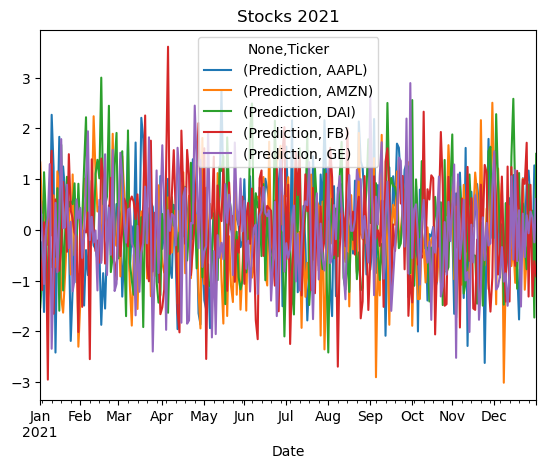

In [31]:
unstacked.plot(title='Stocks 2021')